# Setas para Ronald

![setas en el bosque](data/setas_ilustracion.jpg)

## Definición del problema

Se trata de ayudar a Ronald con un modelo que le prediga perfectamente cuales setas on venenosa y cuál no. 

## Recolección y exploración de Datos

Lo primero de todo, cargamos todas las librerías necesarias. 

In [ ]:
import pandas as pd
import numpy as np

import sys
import os
import re

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, LabelBinarizer, MultiLabelBinarizer, OneHotEncoder 

In [ ]:
import snappy
print(snappy.__version__)

In [ ]:
# contenido = snappy.decompress(open("data/train.snappy", "rb").read()) if os.path.exists("data/train.snappy") else "Archivo no encontrado"

In [ ]:
pd.read_parquet('data/raw/train.snappy')

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.read_parquet('data/raw/train.snappy').iloc[5:9]

In [ ]:
pd.read_parquet('data/raw/train.snappy').iloc[0]

In [ ]:
datos = pd.read_parquet('data/raw/train.snappy')

In [ ]:
#voy a ir alimentando la función con filas de prueba para ver si toma bien los valores
fila= datos.iloc[0:3]
fila

In [ ]:
type(fila)

In [ ]:
#prueba extracción Regex de filas de prueba (ayuda Gemini)
import re

#fila_n = "**La observación** 367 describe una seta de **clase** edible. Tiene una **forma de sombrero** bell con una **superficie** scaly **y un color** yellow. **Presenta** moretones y tiene un **olor** almond. **Las branquias son de tipo** free con una **separación** close **y un tamaño** broad. **El color de las branquias es** black. **La forma del tallo** es enlarging y la **raíz del tallo** es club. **La superficie del tallo por encima del anillo** es smooth y **por debajo del anillo** es smooth. El **color del tallo por encima del anillo** es white y **por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** pendant y **el color de la impresión de esporas** es brown. Se encuentra en una **población** scattered y su **hábitat es** grasses."

fila_n = datos['descripcion'].iloc[3]

diccionario_fila_n = {
    'ID': re.search(r'\*\*La observación\*\*(.*?) describe', fila_n).group(1).strip() if re.search(r'\*\*La observación\*\*(.*?) describe', fila_n) else None,
    'clase': re.search(r'\*\*clase\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*clase\*\*(.*?)\.', fila_n) else None,
    'forma_sombrero': re.search(r'\*\*forma de sombrero\*\* (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*forma de sombrero\*\* (.*?) ', fila_n) else None,
    'superficie': re.search(r'\*\*superficie\*\*(.*?) \*\*y', fila_n).group(1).strip() if re.search(r'\*\*superficie\*\*(.*?) \*\*y', fila_n) else None,
    'color': re.search(r'\*\*y un color\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y un color\*\*(.*?)\.', fila_n) else None,
   
    'moretones': re.search(r'\*\*Presenta\*\*(.*?) y', fila_n).group(1).strip() if re.search(r'\*\*Presenta\*\*(.*?) y', fila_n) else None,
   
    'olor': re.search(r'\*\*olor\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*olor\*\*(.*?)\.', fila_n) else None,
    'tipo_branquias': re.search(r'\*\*Las branquias son de tipo\*\*(.*?) con', fila_n).group(1).strip() if re.search(r'\*\*Las branquias son de tipo\*\*(.*?) con', fila_n) else None,
    'separacion_branquias': re.search(r'\*\*separación\*\*(.*?) \*\*y', fila_n).group(1).strip() if re.search(r'\*\*separación\*\*(.*?) \*\*y', fila_n) else None,
    'tamano_branquias': re.search(r'\*\*y un tamaño\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y un tamaño\*\*(.*?)\.', fila_n) else None,
    'color_branquias': re.search(r'\*\*El color de las branquias es\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*El color de las branquias es\*\*(.*?)\.', fila_n) else None,
    'forma_tallo': re.search(r'\*\*La forma del tallo\*\* (?:es) (.*?) y', fila_n).group(1).strip() if re.search(r'\*\*La forma del tallo\*\* (?:es) (.*?) y', fila_n) else None,
    'raiz_tallo': re.search(r'\*\*raíz del tallo\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*raíz del tallo\*\* (?:es) (.*?)\.', fila_n) else None,
    'superficie_tallo_arriba': re.search(r'\*\*La superficie del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*La superficie del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n) else None,
    'superficie_tallo_abajo': re.search(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n) else None,
    'color_tallo_arriba': re.search(r'\*\*color del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*color del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n) else None,
   
    'color_tallo_abajo': re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1] if re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1] else None,
    
    'tipo_velo': re.search(r'\*\*El tipo de velo\*\* (?:es) (.*?) con', fila_n).group(1).strip() if re.search(r'\*\*El tipo de velo\*\* (?:es) (.*?) con', fila_n) else None,
    'color_velo': re.search(r'\*\*color de velo\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*color de velo\*\*(.*?)\.', fila_n) else None,
    
    'anillo': re.search(r'\.?\s*Tiene ([^.]*?) \*\*anillo\(s\)\*\*', fila_n).group(1).strip() if re.search(r'\.?\s*Tiene ([^.]*?) \*\*anillo\(s\)\*\*', fila_n) else None,
    'tipo_anillo': re.search(r'\*\*de tipo\*\* (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*de tipo\*\* (.*?) ', fila_n) else None,
    'color_impresion_esporas': re.search(r'\*\*y el color de la impresión de esporas\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y el color de la impresión de esporas\*\* (?:es)(.*?)\.', fila_n) else None,
    'poblacion': re.search(r'\*\*población\*\*(.*?) y', fila_n).group(1).strip() if re.search(r'\*\*población\*\*(.*?) y', fila_n) else None,
    'habitat': re.search(r'\*\*hábitat es\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*hábitat es\*\*(.*?)\.', fila_n) else None
}

print(diccionario_fila_n)

In [ ]:
fila

In [ ]:
re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1]

In [ ]:
re.search(r'(?:^|\. )Tiene (.*?) \*\*anillo\(s\)\*\*,', fila_n)

In [ ]:
re.search(r'\*\*clase\*\*(.*?)\. Tiene', fila_n)

Ahora construyo dicho diccionario para todas las filas u observaciones, recorriendo mis datos con una función.

In [ ]:

def extraer_atributos(fila_n):
    """Extrae los atributos de una fila de descripción usando regex."""
    
    return {
    'ID': re.search(r'\*\*La observación\*\*(.*?) describe', fila_n).group(1).strip() if re.search(r'\*\*La observación\*\*(.*?) describe', fila_n) else None,
    'clase': re.search(r'\*\*clase\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*clase\*\*(.*?)\.', fila_n) else None,
    'forma_sombrero': re.search(r'\*\*forma de sombrero\*\* (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*forma de sombrero\*\* (.*?) ', fila_n) else None,
    'superficie': re.search(r'\*\*superficie\*\*(.*?) \*\*y', fila_n).group(1).strip() if re.search(r'\*\*superficie\*\*(.*?) \*\*y', fila_n) else None,
    'color': re.search(r'\*\*y un color\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y un color\*\*(.*?)\.', fila_n) else None,
    'moretones': re.search(r'\*\*Presenta\*\*(.*?) y', fila_n).group(1).strip() if re.search(r'\*\*Presenta\*\*(.*?) y', fila_n) else None,
    'olor': re.search(r'\*\*olor\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*olor\*\*(.*?)\.', fila_n) else None,
    'tipo_branquias': re.search(r'\*\*Las branquias son de tipo\*\*(.*?) con', fila_n).group(1).strip() if re.search(r'\*\*Las branquias son de tipo\*\*(.*?) con', fila_n) else None,
    'separacion_branquias': re.search(r'\*\*separación\*\*(.*?) \*\*y', fila_n).group(1).strip() if re.search(r'\*\*separación\*\*(.*?) \*\*y', fila_n) else None,
    'tamano_branquias': re.search(r'\*\*y un tamaño\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y un tamaño\*\*(.*?)\.', fila_n) else None,
    'color_branquias': re.search(r'\*\*El color de las branquias es\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*El color de las branquias es\*\*(.*?)\.', fila_n) else None,
    'forma_tallo': re.search(r'\*\*La forma del tallo\*\* (?:es) (.*?) y', fila_n).group(1).strip() if re.search(r'\*\*La forma del tallo\*\* (?:es) (.*?) y', fila_n) else None,
    'raiz_tallo': re.search(r'\*\*raíz del tallo\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*raíz del tallo\*\* (?:es) (.*?)\.', fila_n) else None,
    'superficie_tallo_arriba': re.search(r'\*\*La superficie del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*La superficie del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n) else None,
    'superficie_tallo_abajo': re.search(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n) else None,
    'color_tallo_arriba': re.search(r'\*\*color del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*color del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n) else None,
    'color_tallo_abajo': re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1] if re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1] else None,
    'tipo_velo': re.search(r'\*\*El tipo de velo\*\* (?:es) (.*?) con', fila_n).group(1).strip() if re.search(r'\*\*El tipo de velo\*\* (?:es) (.*?) con', fila_n) else None,
    'color_velo': re.search(r'\*\*color de velo\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*color de velo\*\*(.*?)\.', fila_n) else None,
    'anillo': re.search(r'\.?\s*Tiene ([^.]*?) \*\*anillo\(s\)\*\*', fila_n).group(1).strip() if re.search(r'\.?\s*Tiene ([^.]*?) \*\*anillo\(s\)\*\*', fila_n) else None,
    'tipo_anillo': re.search(r'\*\*de tipo\*\* (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*de tipo\*\* (.*?) ', fila_n) else None,
    'color_impresion_esporas': re.search(r'\*\*y el color de la impresión de esporas\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y el color de la impresión de esporas\*\* (?:es)(.*?)\.', fila_n) else None,
    'poblacion': re.search(r'\*\*población\*\*(.*?) y', fila_n).group(1).strip() if re.search(r'\*\*población\*\*(.*?) y', fila_n) else None,
    'habitat': re.search(r'\*\*hábitat es\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*hábitat es\*\*(.*?)\.', fila_n) else None
}


# Aplicar la función a todas las filas
datos_extraidos = datos['descripcion'].apply(extraer_atributos)



In [ ]:
datos_extraidos

In [ ]:
# Convertir a DataFrame
df_0 = pd.DataFrame(datos_extraidos.tolist()).set_index('ID')


df_0.head(10)

In [ ]:
df_0.info()

In [ ]:
print(df_0.isnull().sum())

Ya observo problemas con la columna 'moretones'. Donde aparezca 'None', entendemos que no presenta moretones.

In [ ]:
df_0['moretones'].unique()

In [ ]:
df_0['anillo'].unique()

Veamos qué columnas solamente tienen dos valores, para estar atento y poder quedarme solo con una columna y no aumentar innecesariamente el numero de columnas.

In [ ]:
# Encontrar columnas con exactamente dos valores únicos
binary_columns = []
for column in df_0.columns:
    unique_values = df_0[column].nunique()
    if unique_values == 2:
        print(f"Columna: {column}")
        print(f"Valores únicos: {df_0[column].unique()}")
        print("---")
        binary_columns.append(column)

print("\nTotal de columnas binarias:", len(binary_columns))
print("Lista de columnas binarias:", binary_columns)

Antes de proceder a convertir en numéricos y para entender mejor los valores que aparecen en cada columna, voy a obtener sus valores únicos. 

In [ ]:
# Obtener valores únicos por cada columna
for column in df_0.columns:
    unique_values = df_0[column].unique()
    unique_values_str = ", ".join(map(str, unique_values))  # Convertir valores a string para impresión
    print(f"Columna: {column}, Valores únicos: {unique_values_str}")
    print("---")

Observo algún valor extraño que investigo por si hay algún error.

In [ ]:
df_c = df_0[df_0['forma_sombrero'] == 'c']
df_c


In [ ]:
# Filtrar filas donde la columna 'descripcion' contiene '4711' o '6246'
datos_filtrados = datos[datos['descripcion'].str.contains('4711|6246', regex=True, na=False)]
datos_filtrados


Observo que esa rareza del valor 'forma_sombrero' no es un error sino que debe ser en forma de C

Procede considerar lo siguiente:
- clase (target), binaria: edible, poisonous

- forma_sombrero, Valores únicos: bell, convex, flat, sunken, knobbed, c. Columnas binarias.
- superficie, Valores únicos: scaly, smooth, fibrous. Columnas binarias.
- color, Valores únicos: yellow, red, green, white, brown, pink, cinnamon, buff, purple. Columnas binarias.
- color_branquias, Valores únicos: black, buff, pink, purple, chocolate, white, brown, gray, red, orange, yellow, green. Columnas binarias.
- superficie_tallo_arriba, Valores únicos: smooth, silky, fibrous, scaly. Columnas binarias.
- superficie_tallo_abajo, Valores únicos: smooth, silky, fibrous, scaly. Columnas binarias.
- color_tallo_arriba, Valores únicos: white, pink, gray, red, buff, brown, orange, cinnamon, yellow. Columnas binarias.
- color_tallo_abajo, Valores únicos: white, pink, gray, buff, brown, red, orange, cinnamon, yellow. Columnas binarias.
- color_velo, Valores únicos: white, orange, brown, yellow. Columnas binarias.
- color_impresion_esporas, Valores únicos: brown, white, chocolate, black, purple, buff, yellow, green, orange. Columnas binarias.
- habitat, Valores únicos: grasses, paths, wood, leaves, urban, waste, meadows. Columnas binarias.

- olor, Valores únicos: almond, foul, null, spicy, creosote, anise, fishy, pungent, musty. Columnas binarias. Elimino null.
- raiz_tallo, Valores únicos: club, ?, bulbous, equal, rooted. Columnas binarias. Elimino ?.
- tipo_anillo, Valores únicos: pendant, evanescent, large, flaring, null. Columnas binarias. Elimino null.
- moretones, Valores únicos: moretones, None. Columna binaria. Elimino None.

- tipo_branquias, Valores únicos: free, attached. Columna binaria, descartando una.
- separacion_branquias, Valores únicos: close, crowded. Columna binaria, descartando una.
- tamano_branquias, Valores únicos: broad, narrow. Columna binaria, descartando una.
- forma_tallo, Valores únicos: enlarging, tapering. Columna binaria, descartando una. 

- tipo_velo, Valores únicos: partial. Columna binaria.

- anillo, Valores únicos: one, two, null. Columna ordinal, usaré OrdinalEncoder donde null será 0.

- poblacion, Valores únicos: scattered=1, several=2, abundant=5, solitary=0, clustered=3, numerous=4, usaré OrdinalEncoder 

Respecto a la clase, target del objetivo, observo que solo existe comestible o venenosa, como parecía lógico (se ha omitido clase 'tóxica'.

In [ ]:
df_0['clase'].unique()

In [ ]:
import matplotlib.pyplot as plt

# Contamos la frecuencia de los valores en la columna 'clase'
frecuencia_clase = df_0['clase'].value_counts()

# Calculamos el porcentaje de cada clase con respecto al total
porcentaje_clase = (frecuencia_clase / len(df_0)) * 100

# Crear el histograma
plt.figure(figsize=(8, 6))
bars = plt.bar(frecuencia_clase.index, frecuencia_clase.values, color='skyblue')

# Agregar títulos y etiquetas
plt.title('Histograma de la columna "clase"', fontsize=14)
plt.xlabel('Clase: comestible/ venenosa', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Agregar el número total y porcentaje dentro de cada barra
for bar, count, percentage in zip(bars, frecuencia_clase.values, porcentaje_clase):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, 
             f'{count} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=10)

# Mostrar la gráfica
plt.show()


- Se trata de un problema de clasificación binaria.
- Vamos a trabajar con modelos supervisados, dado que conocemos la target a predecir, pero nos apoyaremos antes en modelos no-supervisados para clusterizar grupos con características similares, que nos puedan ayudar. 
- Observo un desbalance importante en la target a predecir, lo cual habremos de considerar y cuidar.

## Preprocesamiento de Datos Inicial

Voy a convertir todos mis valores a numéricos

In [ ]:
# función conversión a numerícos (ayuda Claude)
def convert_to_numeric(df):
    """
    Convierte todas las columnas categóricas a numéricas usando MultiLabelBinarizer
    manejando adecuadamente los valores nulos
    Args:
        df: DataFrame original con columnas tipo 'object'
    Returns:
        DataFrame con todas las columnas convertidas a numéricas
    """
    # Crear una copia del DataFrame
    df_numeric = df.copy()
    
    # Para cada columna en el DataFrame
    for column in df_numeric.columns:
        # Reemplazar valores nulos con 'missing'
        df_numeric[column] = df_numeric[column].fillna('missing')
        
        # Convertir cada valor a una lista para MultiLabelBinarizer
        values = [[val] for val in df_numeric[column]]
        
        # Crear y ajustar el MultiLabelBinarizer
        mlb = MultiLabelBinarizer()
        # Transformar la columna
        encoded = mlb.fit_transform(values)
        
        # Crear nombres para las nuevas columnas
        new_columns = [f"{column}_{class_name}" for class_name in mlb.classes_]
        
        # Convertir a DataFrame
        encoded_df = pd.DataFrame(encoded, columns=new_columns, index=df.index)
        
        # Eliminar la columna original y añadir las nuevas
        df_numeric = df_numeric.drop(column, axis=1)
        df_numeric = pd.concat([df_numeric, encoded_df], axis=1)
    
    return df_numeric

In [ ]:
df_numeric = convert_to_numeric(df_0)
df_numeric

Antes de proseguir, voy a ver eliminar algunas columnas según mi análisis, a la vez que convertir algunas en numero ordinal para tener un conjunto de datos más compacto y adecuado.

In [ ]:
def convert_to_numeric_better(df):
    df_numeric2 = df.copy()  # Copia para no modificar el original
    
    
    # Para las columnas específicas, usamos OrdinalEncoder
    encoder_anillo = OrdinalEncoder(categories=[['null', 'one', 'two']])
    
    # Agregar las categorías que ya existen en los datos
    encoder_poblacion = OrdinalEncoder(categories=[['solitary', 'scattered', 'several', 'clustered', 'numerous', 'abundant']])
    
    # Convertir 'anillo' con OrdinalEncoder
    df_numeric2['anillo'] = encoder_anillo.fit_transform(df_numeric2[['anillo']])
    
    # Convertir 'población' con OrdinalEncoder
    df_numeric2['poblacion'] = encoder_poblacion.fit_transform(df_numeric2[['poblacion']])
    
    # Para el resto de las columnas, usamos MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    for column in df_numeric2.columns:
        if column not in ['anillo', 'poblacion']:  # Evitar las columnas que ya hemos procesado
            # Convertimos a lista de etiquetas
            df_numeric2[column] = df_numeric2[column].apply(lambda x: [x] if isinstance(x, str) else [])

            # Aplicamos el MultiLabelBinarizer
            binarized = mlb.fit_transform(df_numeric2[column])
            labels = mlb.classes_
            
            # Creamos nuevas columnas para las etiquetas
            for idx, label in enumerate(labels):
                df_numeric2[f'{column}_{label}'] = binarized[:, idx]
            
            # Eliminamos la columna original
            df_numeric2.drop(columns=[column], inplace=True)

    # Eliminamos las columnas cuyo nombre contenga 'null', 'None' o '?'
    columns_to_drop = [col for col in df_numeric2.columns if 'null' in col or 'None' in col or '?' in col]
    df_numeric2.drop(columns=columns_to_drop, inplace=True)
    
    return df_numeric2


In [ ]:
df_numeric2 = convert_to_numeric_better (df_0)
df_numeric2.head()

In [ ]:
columnas = df_numeric2.columns.tolist()
columnas

Voy a hacer un ajuste en la target, de acuerdo a lo solicitado en la Competición de Kaggle. 


In [ ]:
def ajuste_target(df):
    """
    Elimina la columna 'clase_edible' y renombra 'clase_poisonous' a 'death'
    
    Args:
        df: DataFrame con las columnas 'clase_edible' y 'clase_poisonous'
    
    Returns:
        DataFrame sin 'clase_edible' y con 'clase_poisonous' renombrada a 'death'
    """
    # Crear una copia del DataFrame
    df_ML = df.copy()
    
    # Eliminar la columna 'clase_edible'
    if 'clase_edible' in df_ML.columns:
        df_ML = df_ML.drop('clase_edible', axis=1)
    
    # Renombrar 'clase_poisonous' a 'death'
    if 'clase_poisonous' in df_ML.columns:
        df_ML = df_ML.rename(columns={'clase_poisonous': 'death'})
    
    # Colocar la columna 'death' en la primera posición
    if 'death' in df_ML.columns:
        death_column = df_ML.pop('death')
        df_ML.insert(0, 'death', death_column)
    
    return df_ML

In [ ]:
ajuste_target(df_numeric2)

In [ ]:
df_final= ajuste_target(df_numeric2)

In [ ]:
df_final.head(3)

In [ ]:
# Guardar en formato JSON optimizado
df_final.to_json('data/processed/setas_Ronald_ML_Kaggle.json', 
                 orient='records',  # Cada fila como objeto JSON independiente
                 indent=4       # Formato legible #
            )

## Feature Engineering


Voy a evaluar la importancia de cada variable en la predicción, para poder realizar una reducción de dimensionalidad si así puedo concluirlo. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Definir variables predictoras (X) y la variable objetivo (y)
X = df_final.drop(columns=['death'])  # Todas las columnas excepto 'death'
y = df_final['death']  # Target

# Dividir en conjunto de entrenamiento y prueba (opcional, pero recomendado)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Obtener la importancia de las características
importancias = model.feature_importances_

# Crear un DataFrame con las importancias y las columnas
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importancias})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar las 20 características más importantes
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características - Random Forest')
plt.gca().invert_yaxis()  # Para que la más importante esté arriba
plt.show()



In [ ]:
# Mostrar las 20 características más importantes en tabla
feature_importance_df.head(20)

In [ ]:
df_final.head(3)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que df es tu DataFrame con las columnas numéricas
plt.figure(figsize=(12, 10))

# Calcular la matriz de correlación
corr_matrix = df_final.corr()

# Crear un mapa de calor con seaborn
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

# Agregar título
plt.title("Matriz de Correlación", fontsize=14)
plt.show()


Eliminamos aquellas columnas que tienen alta correlación entre sí. Fijamos 80%.

In [ ]:
corr_matrix = df_final.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontrar columnas con alta correlación (por ejemplo, >0.8)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

df_reducido1 = df_final.drop(columns=to_drop)

df_reducido1.head()


Eliminamos aquellas columnas que NO tienen correlación mínima con la variable a predecir, target. Fijamos 10%.

In [ ]:
correlaciones = df_reducido1.corr()["death"].abs().sort_values(ascending=False)
top_features = correlaciones[correlaciones > 0.1].index  # Se pueden ajustar los valores
df_reducido2 = df_reducido1[top_features]

df_reducido2.head()


Tercer paso, voy a explorar si Recursive Feature Elimination (RFE), haciendo una selección del modelo funciona mejor.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = df_reducido2.drop(columns=["death"])
y = df_reducido2["death"]

model = RandomForestClassifier()
selector = RFE(model, n_features_to_select=30)  # Ajusta a la mitad de las columnas que tengo
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
df_reducido3 = df_reducido2[selected_features.insert(0, "death")]

df_reducido3.head()

_________________________________
### Baseline de trabajo
Realizo una función pack de modelos para evaluar cuál funciona mejor. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

def evaluar_modelos(X, y):
    """
    Evalúa varios modelos de clasificación binaria con validación cruzada
    y muestra su matriz de confusión promedio.

    Parámetros:
        X: DataFrame con las características
        y: Serie con la variable objetivo ('death')

    Retorna:
        Un DataFrame con métricas de rendimiento de cada modelo.
    """
    # División en entrenamiento y validación (80%-20%)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    modelos = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "KNN": KNeighborsClassifier(),
        "SVM": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Bagging Classifier": BaggingClassifier(),
        "Random Forest": RandomForestClassifier()
    }
    
    resultados = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for nombre, modelo in modelos.items():
        print(f"\nEvaluando modelo: {nombre}")

        # Entrenar el modelo con los datos de entrenamiento
        modelo.fit(X_train, y_train)
        
        # Validación cruzada con predicciones
        y_pred = cross_val_predict(modelo, X_valid, y_valid, cv=skf)

        # Calcular matriz de confusión
        cm = confusion_matrix(y_valid, y_pred)
        
        # Normalizar matriz de confusión
        cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

        # Reporte de clasificación
        reporte = classification_report(y_valid, y_pred, output_dict=True)
        accuracy = reporte["accuracy"]
        precision = reporte["1"]["precision"]
        recall = reporte["1"]["recall"]
        f1_score = reporte["1"]["f1-score"]

        resultados.append({
            "Modelo": nombre,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1_score
        })

        # Graficar matriz de confusión
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["No Death", "Death"], yticklabels=["No Death", "Death"])
        plt.xlabel("Predicción")
        plt.ylabel("Real")
        plt.title(f"Matriz de Confusión - {nombre}")
        plt.show()

    # Convertir resultados en DataFrame
    df_resultados = pd.DataFrame(resultados).sort_values(by="F1 Score", ascending=False)
    return df_resultados




In [ ]:
# df es el DataFrame con los datos, donde 'death' es la columna objetivo
df = df_reducido3

X = df.drop(columns=["death"])
y = df["death"]

resultados = evaluar_modelos(X, y)

# Guardar el nombre manualmente
# nombre_df = "df_reducido3"

# Imprimir el nombre del conjunto de datos
# print(f"Nombre del Conjunto de Datos: {nombre_df}")

print(resultados)

El modelo que mejor predice y mejor Recall tiene, que es, en el fondo, lo que más nos interesa, es Random Forest. 

Por otro lado, veo que funciona mejor el conjunto de datos con todos los datos (df_final) que cuando empiezo a eliminar columnas. Solo observo que df_reducido3, en el modelo de SVM o RandomForest.



___________________
Voy a probar a aplicar la técnica / herramienta de Principal Component Analysis, PCA de SKlearn, para estudiar si puedo reducir la complejidad, dimensiones, y evitar el sobreajuste.

In [ ]:
df_final.head(2)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

X = df_final.select_dtypes(include=['number'])  # Filtra solo columnas numéricas

selector = VarianceThreshold(threshold=0.0)  # Elimina columnas con varianza 0
X_filtered = selector.fit_transform(X)  # Aplica filtro

print("Forma antes de filtrar:", X.shape)
print("Forma después de filtrar:", X_filtered.shape)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Asegurar que no incluimos la variable objetivo en PCA
X = df_final.drop(columns=["death"])  
y = df_final["death"]

# Normalizar los datos antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Aplicar PCA
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Convertir a DataFrame y conservar los índices originales
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])], index=X.index)

# Agregar la variable objetivo sin NaN
df_pca["death"] = y

# Explicar cuánta varianza explica cada componente
explained_variance = pca.explained_variance_ratio_

# Graficar la varianza explicada por cada componente principal
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="--", color="b")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada")
plt.title("Varianza Explicada por cada Componente Principal")
plt.show()

# Mostrar el nuevo DataFrame reducido
print(f"Dimensiones originales: {X.shape[1]}")
print(f"Dimensiones después de PCA: {df_pca.shape[1] - 1}")  # -1 porque incluye "death"
df_pca.head()


Aplico mi baseline de trabajo al dataframe obtenido para ver los resultados. 

In [ ]:
# df es el DataFrame con los datos, donde 'death' es la columna objetivo
df = df_pca

X = df.drop(columns=["death"])
y = df["death"]

resultados = evaluar_modelos(X, y)

# Guardar el nombre manualmente
nombre_df = "df_PCA"

# Imprimir el nombre del conjunto de datos
# print(f"Nombre del Conjunto de Datos: {nombre_df}")

print(resultados)

_________________________________CONCLUSIÓN: MODELO ELEGIDO

Ahora obtengo con el modelo reducido por PCA y limitado a 58 columnas, un valor 'perfecto' con el modelo RandomForest.Así pues, ahora acumulo el codigo para aplicar a 'test' y probar y subir a Kaggle.

In [1]:
import pandas as pd
import numpy as np

import sys
import os
import re

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, MultiLabelBinarizer

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report


datos = pd.read_parquet('data/raw/train.snappy')

In [2]:

def extraer_atributos(fila_n):
    """Extrae los atributos de una fila de descripción usando regex."""
    
    return {
    'ID': re.search(r'\*\*La observación\*\*(.*?) describe', fila_n).group(1).strip() if re.search(r'\*\*La observación\*\*(.*?) describe', fila_n) else None,
    'clase': re.search(r'\*\*clase\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*clase\*\*(.*?)\.', fila_n) else None,
    'forma_sombrero': re.search(r'\*\*forma de sombrero\*\* (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*forma de sombrero\*\* (.*?) ', fila_n) else None,
    'superficie': re.search(r'\*\*superficie\*\*(.*?) \*\*y', fila_n).group(1).strip() if re.search(r'\*\*superficie\*\*(.*?) \*\*y', fila_n) else None,
    'color': re.search(r'\*\*y un color\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y un color\*\*(.*?)\.', fila_n) else None,
    'moretones': re.search(r'\*\*Presenta\*\*(.*?) y', fila_n).group(1).strip() if re.search(r'\*\*Presenta\*\*(.*?) y', fila_n) else None,
    'olor': re.search(r'\*\*olor\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*olor\*\*(.*?)\.', fila_n) else None,
    'tipo_branquias': re.search(r'\*\*Las branquias son de tipo\*\*(.*?) con', fila_n).group(1).strip() if re.search(r'\*\*Las branquias son de tipo\*\*(.*?) con', fila_n) else None,
    'separacion_branquias': re.search(r'\*\*separación\*\*(.*?) \*\*y', fila_n).group(1).strip() if re.search(r'\*\*separación\*\*(.*?) \*\*y', fila_n) else None,
    'tamano_branquias': re.search(r'\*\*y un tamaño\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y un tamaño\*\*(.*?)\.', fila_n) else None,
    'color_branquias': re.search(r'\*\*El color de las branquias es\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*El color de las branquias es\*\*(.*?)\.', fila_n) else None,
    'forma_tallo': re.search(r'\*\*La forma del tallo\*\* (?:es) (.*?) y', fila_n).group(1).strip() if re.search(r'\*\*La forma del tallo\*\* (?:es) (.*?) y', fila_n) else None,
    'raiz_tallo': re.search(r'\*\*raíz del tallo\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*raíz del tallo\*\* (?:es) (.*?)\.', fila_n) else None,
    'superficie_tallo_arriba': re.search(r'\*\*La superficie del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*La superficie del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n) else None,
    'superficie_tallo_abajo': re.search(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n) else None,
    'color_tallo_arriba': re.search(r'\*\*color del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*color del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n) else None,
    'color_tallo_abajo': re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1] if re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1] else None,
    'tipo_velo': re.search(r'\*\*El tipo de velo\*\* (?:es) (.*?) con', fila_n).group(1).strip() if re.search(r'\*\*El tipo de velo\*\* (?:es) (.*?) con', fila_n) else None,
    'color_velo': re.search(r'\*\*color de velo\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*color de velo\*\*(.*?)\.', fila_n) else None,
    'anillo': re.search(r'\.?\s*Tiene ([^.]*?) \*\*anillo\(s\)\*\*', fila_n).group(1).strip() if re.search(r'\.?\s*Tiene ([^.]*?) \*\*anillo\(s\)\*\*', fila_n) else None,
    'tipo_anillo': re.search(r'\*\*de tipo\*\* (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*de tipo\*\* (.*?) ', fila_n) else None,
    'color_impresion_esporas': re.search(r'\*\*y el color de la impresión de esporas\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y el color de la impresión de esporas\*\* (?:es)(.*?)\.', fila_n) else None,
    'poblacion': re.search(r'\*\*población\*\*(.*?) y', fila_n).group(1).strip() if re.search(r'\*\*población\*\*(.*?) y', fila_n) else None,
    'habitat': re.search(r'\*\*hábitat es\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*hábitat es\*\*(.*?)\.', fila_n) else None
}


# Aplicar la función a todas las filas
datos_extraidos = datos['descripcion'].apply(extraer_atributos)



In [3]:
def convert_to_numeric_better(df):
    df_numeric2 = df.copy()  # Copia para no modificar el original
    
    
    # Para las columnas específicas, usamos OrdinalEncoder
    encoder_anillo = OrdinalEncoder(categories=[['null', 'one', 'two']])
    
    # Agregar las categorías que ya existen en los datos
    encoder_poblacion = OrdinalEncoder(categories=[['solitary', 'scattered', 'several', 'clustered', 'numerous', 'abundant']])
    
    # Convertir 'anillo' con OrdinalEncoder
    df_numeric2['anillo'] = encoder_anillo.fit_transform(df_numeric2[['anillo']])
    
    # Convertir 'población' con OrdinalEncoder
    df_numeric2['poblacion'] = encoder_poblacion.fit_transform(df_numeric2[['poblacion']])
    
    # Para el resto de las columnas, usamos MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    for column in df_numeric2.columns:
        if column not in ['anillo', 'poblacion']:  # Evitar las columnas que ya hemos procesado
            # Convertimos a lista de etiquetas
            df_numeric2[column] = df_numeric2[column].apply(lambda x: [x] if isinstance(x, str) else [])

            # Aplicamos el MultiLabelBinarizer
            binarized = mlb.fit_transform(df_numeric2[column])
            labels = mlb.classes_
            
            # Creamos nuevas columnas para las etiquetas
            for idx, label in enumerate(labels):
                df_numeric2[f'{column}_{label}'] = binarized[:, idx]
            
            # Eliminamos la columna original
            df_numeric2.drop(columns=[column], inplace=True)

    # Eliminamos las columnas cuyo nombre contenga 'null', 'None' o '?'
    columns_to_drop = [col for col in df_numeric2.columns if 'null' in col or 'None' in col or '?' in col]
    df_numeric2.drop(columns=columns_to_drop, inplace=True)
    
    return df_numeric2


In [4]:
df_0 = pd.DataFrame(datos_extraidos.tolist()).set_index('ID')

df_numeric2 = convert_to_numeric_better (df_0)

/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_70258/2184919210.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_numeric2[f'{column}_{label}'] = binarized[:, idx]
/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_70258/2184919210.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_numeric2[f'{column}_{label}'] = binarized[:, idx]
/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_70258/2184919210.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of call

In [5]:
def ajuste_target(df):
    """
    Elimina la columna 'clase_edible' y renombra 'clase_poisonous' a 'death'
    
    Args:
        df: DataFrame con las columnas 'clase_edible' y 'clase_poisonous'
    
    Returns:
        DataFrame sin 'clase_edible' y con 'clase_poisonous' renombrada a 'death'
    """
    # Crear una copia del DataFrame
    df_ML = df.copy()
    
    # Eliminar la columna 'clase_edible'
    if 'clase_edible' in df_ML.columns:
        df_ML = df_ML.drop('clase_edible', axis=1)
    
    # Renombrar 'clase_poisonous' a 'death'
    if 'clase_poisonous' in df_ML.columns:
        df_ML = df_ML.rename(columns={'clase_poisonous': 'death'})
    
    # Colocar la columna 'death' en la primera posición
    if 'death' in df_ML.columns:
        death_column = df_ML.pop('death')
        df_ML.insert(0, 'death', death_column)
    
    return df_ML

In [6]:
df_final= ajuste_target(df_numeric2)

In [7]:
corr_matrix = df_final.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontrar columnas con alta correlación (por ejemplo, >0.8)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

df_reducido1 = df_final.drop(columns=to_drop)

In [8]:
correlaciones = df_reducido1.corr()["death"].abs().sort_values(ascending=False)
top_features = correlaciones[correlaciones > 0.1].index  # Se pueden ajustar los valores
df_reducido2 = df_reducido1[top_features]

In [9]:
X = df_reducido2.drop(columns=["death"])
y = df_reducido2["death"]

model = RandomForestClassifier()
selector = RFE(model, n_features_to_select=30)  # Ajusta a la mitad de las columnas que tengo
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
df_reducido3 = df_reducido2[selected_features.insert(0, "death")]

Ahora me vale con hacer solamente un PCA

In [10]:
# Asegurar que no incluimos la variable objetivo en PCA
X = df_reducido3.drop(columns=["death"])  
y = df_reducido3["death"]

# Normalizar los datos antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Convertir a DataFrame y conservar los índices originales
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])], index=X.index)

# Agregar la variable objetivo sin NaN
df_pca["death"] = y

# Mostrar el nuevo DataFrame reducido
print(f"Dimensiones originales: {X.shape[1]}")
print(f"Dimensiones después de PCA: {df_pca.shape[1] - 1}")  # -1 porque incluye "death"
df_pca.head()


Dimensiones originales: 30
Dimensiones después de PCA: 19


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,death
ID,,,,,,,,,,,,,,,,,,,,
367,2.171017,-0.189112,0.001222,0.676746,0.542294,1.716801,0.414581,-0.321832,-0.439918,0.409589,1.135330,-1.262906,-0.389509,0.724571,0.398110,-0.235816,-0.193070,-0.538558,-0.154216,0
5123,-5.340571,-0.033188,-0.883459,0.273352,1.019675,0.326874,-0.039784,-0.802718,-0.675831,-0.439636,0.500330,0.976518,0.352925,0.384190,-0.998874,-0.361252,-1.233708,0.913995,-0.745589,1
2864,2.174337,1.615480,-0.032224,-0.832643,-1.101932,1.043947,0.695353,0.269105,0.264770,0.316872,0.370839,0.350829,-0.854351,0.371299,-0.876804,0.050211,1.338940,-0.283111,0.175326,0
4674,0.828970,-2.082356,2.184547,0.130761,0.512174,0.809935,-1.630647,-2.053166,-2.360948,-0.293068,-1.194974,-1.132164,0.773866,1.111733,-2.005691,2.046439,-0.273227,-1.815317,0.464794,1
1210,0.517835,-5.814715,2.065106,-1.260010,-0.196803,-0.994133,-2.063684,-0.867605,-0.977125,-0.008348,-0.905456,-0.214091,0.607117,-0.592283,-0.003063,1.188462,0.224636,0.156098,0.446493,0


In [11]:
def evaluar_random_forest(X, y):
    """
    Evalúa el modelo RandomForestClassifier con validación cruzada
    y muestra su matriz de confusión promedio.

    Parámetros:
        X: DataFrame con las características
        y: Serie con la variable objetivo ('death')

    Retorna:
        Un DataFrame con métricas de rendimiento del modelo.
    """
    # División en entrenamiento y validación (80%-20%)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    modelo = RandomForestClassifier()
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Entrenar el modelo con los datos de entrenamiento
    modelo.fit(X_train, y_train)
    
    # Validación cruzada con predicciones
    y_pred = cross_val_predict(modelo, X_valid, y_valid, cv=skf)

    # Calcular matriz de confusión
    cm = confusion_matrix(y_valid, y_pred)
    
    # Normalizar matriz de confusión
    cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    # Reporte de clasificación
    reporte = classification_report(y_valid, y_pred, output_dict=True)
    
    resultados = {
        "Modelo": "Random Forest",
        "Accuracy": reporte["accuracy"],
        "Precision": reporte["1"]["precision"],
        "Recall": reporte["1"]["recall"],
        "F1 Score": reporte["1"]["f1-score"]
    }

    # Graficar matriz de confusión
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["No Death", "Death"], yticklabels=["No Death", "Death"])
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title("Matriz de Confusión - Random Forest")
    plt.show()

    # Convertir resultados en DataFrame
    df_resultado = pd.DataFrame([resultados])
    return df_resultado


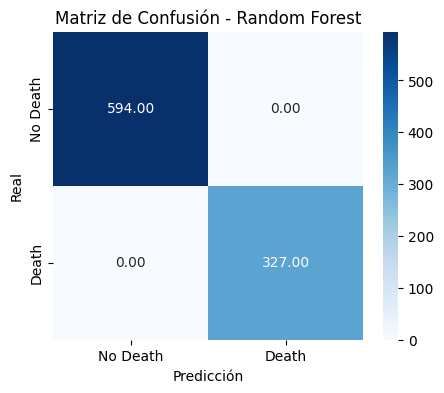

          Modelo  Accuracy  Precision  Recall  F1 Score
0  Random Forest       1.0        1.0     1.0       1.0


In [12]:
# df es el DataFrame con los datos, donde 'death' es la columna objetivo
df = df_pca

X = df.drop(columns=["death"])
y = df["death"]

resultados = evaluar_random_forest(X, y)

# Guardar el nombre manualmente
nombre_df = "df_PCA"

# Imprimir el nombre del conjunto de datos
# print(f"Nombre del Conjunto de Datos: {nombre_df}")

print(resultados)